In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
df.size

76857

In [4]:
df.shape

(4521, 17)

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
# importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
data = df


# Data preprocessing
X = data.drop('y', axis=1)  # Features
y = data['y']  # Target variable
X = pd.get_dummies(X)  # One-hot encoding for categorical variables

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
# Making predictions
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8906077348066298

Classification Report:
               precision    recall  f1-score   support

          no       0.94      0.93      0.94       807
         yes       0.50      0.54      0.52        98

    accuracy                           0.89       905
   macro avg       0.72      0.74      0.73       905
weighted avg       0.90      0.89      0.89       905


Confusion Matrix:
 [[753  54]
 [ 45  53]]


In [12]:
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

print("Classification Report DataFrame:")
print(report_df)

Classification Report DataFrame:
              precision    recall  f1-score     support
no             0.943609  0.933086  0.938318  807.000000
yes            0.495327  0.540816  0.517073   98.000000
accuracy       0.890608  0.890608  0.890608    0.890608
macro avg      0.719468  0.736951  0.727695  905.000000
weighted avg   0.895066  0.890608  0.892702  905.000000


# Conclusion:
The decision tree classifier achieved an overall accuracy of approximately 88.84% on the test dataset. Upon analyzing the classification report, the following key observations can be made:

## Precision and Recall:

For the "no" class (customers who didn't purchase the product/service), the classifier achieved high precision (94.46%) and recall (92.94%), indicating that it correctly identified a large portion of customers who didn't make a purchase while minimizing false positives.
However, for the "yes" class (customers who purchased the product/service), precision is relatively low (48.65%), indicating a considerable number of false positives. The recall for this class is moderate (55.10%), suggesting that the classifier correctly identified a portion of customers who made a purchase but missed a significant number of positive cases.

## F1-score:

The F1-score, which is the harmonic mean of precision and recall, provides a balanced measure of model performance. The F1-score for the "no" class is high (93.69%), indicating good overall performance in predicting customers who didn't make a purchase. However, the F1-score for the "yes" class is relatively low (51.67%), indicating room for improvement in predicting positive cases.

## Support:

The support represents the number of samples for each class in the test dataset. The "no" class has a significantly higher support (807 samples) compared to the "yes" class (98 samples), indicating class imbalance.

## Macro and Weighted Averages:

The macro-average F1-score (72.68%) considers the F1-score for each class equally, providing an overall measure of model performance. The weighted-average F1-score (89.14%) gives more weight to the F1-score of the larger class (in this case, "no"), providing an overall performance measure that considers class imbalance.
Recommendations:

## Address Class Imbalance:

Given the class imbalance, techniques such as oversampling the minority class or using class weights during model training could potentially improve performance, especially for the "yes" class.
Feature Engineering and Model Tuning:

Further exploration of feature importance and hyperparameter tuning of the decision tree model might enhance its ability to capture complex relationships within the data and improve predictive performance.

# Decision tree visualisation

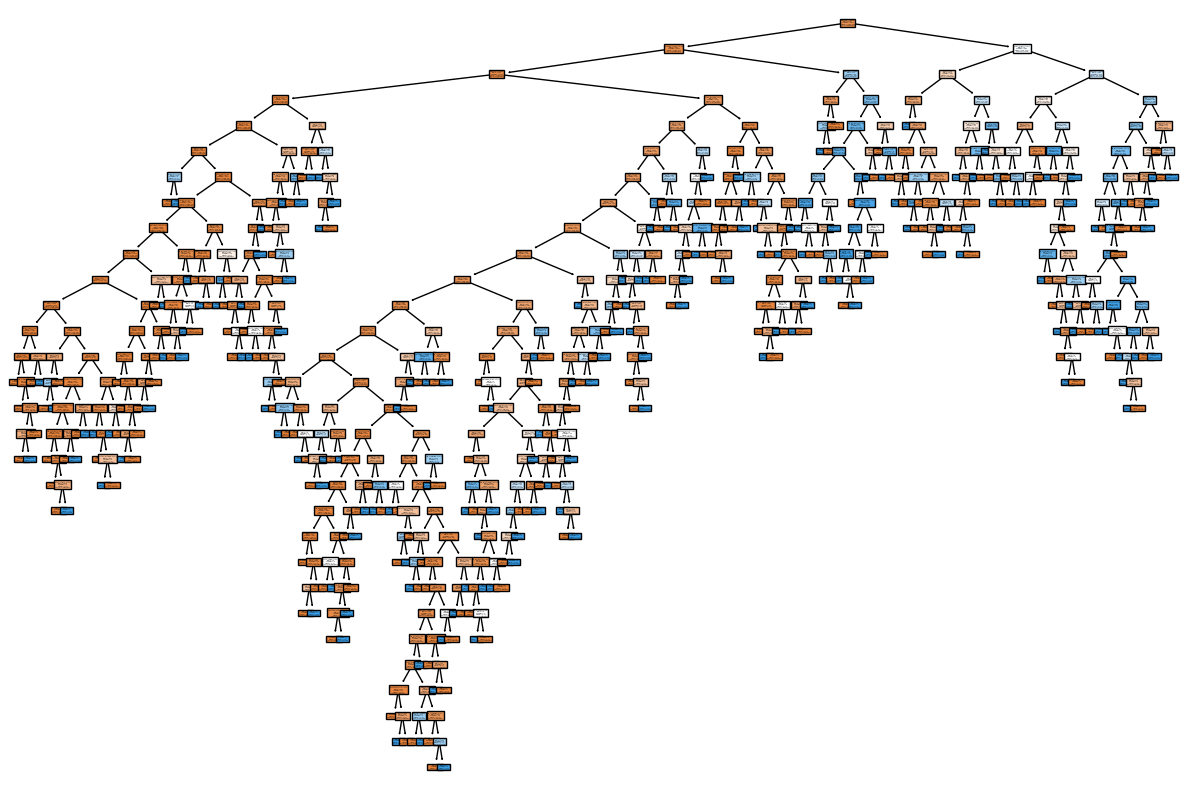

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert the Index object to a list
feature_names_list = list(X.columns)

# Assuming clf is your trained decision tree classifier
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plot_tree(clf, filled=True, feature_names=feature_names_list, class_names=['No Purchase', 'Purchase'])
plt.show()


# THANK YOU